In [1]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from functions import clip, PCAreduce, plotSpectrum

In [ ]:
imgBruiseCube12h = sp.open_image("../Strawberry/Normalised/STR_B1_12h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T112003_raw_rad_nn.hdr")
imgBruiseCube48h = sp.open_image("../Strawberry/Normalised/STR_B1_48h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-04T152605_raw_rad_nn.hdr")
imgHealthyCube = sp.open_image("../Strawberry/Normalised/STR_B1_0mn_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T185621_raw_rad_nn.hdr")

N,M,bands = imgBruiseCube12h.shape


imgBruiseCube12h = imgBruiseCube12h.read_subregion([4600, imgBruiseCube12h.shape[0]], [0, imgBruiseCube12h.shape[1]])
imgBruiseCube48h  = imgBruiseCube48h.read_subregion([4520, imgBruiseCube48h.shape[0]], [0, imgBruiseCube48h.shape[1]])
imgHealthyCube  = imgHealthyCube.read_subregion([4800, 5624], [0, imgHealthyCube.shape[1]])


clip(imgBruiseCube12h, 0, 1)  # clipps the values in imgCube between 0,1.
clip(imgBruiseCube48h, 0, 1)  # clipps the values in imgCube between 0,1.
clip(imgHealthyCube, 0, 1)
print("done")

In [ ]:

#imgCube8bit = (imgCube*255).astype('uint8')
#equ = cv2.equalizeHist(imgCube8bit[:,:,120])
#res = np.hstack((imgCube8bit[:,:,120],equ)) #stacking images side-by-side
#sp.imshow(res, figsize=(15,10))
img12_PCA, eigenvalues1 = PCAreduce(imgBruiseCube12h, frac=0.99)
img48_PCA, eigenvalues2 = PCAreduce(imgBruiseCube48h, frac=0.99)
img1_PCA,  eigenvalues3 = PCAreduce(imgHealthyCube,   frac=0.99)


In [ ]:
img12_PCA_scaled = (img12_PCA - np.amin(img12_PCA)) / (np.amax(img12_PCA) - np.amin(img12_PCA))
img48_PCA_scaled  = (img48_PCA - np.amin(img48_PCA)) / (np.amax(img48_PCA) - np.amin(img48_PCA))
img1_PCA_scaled  = (img1_PCA - np.amin(img1_PCA)) / (np.amax(img1_PCA) - np.amin(img1_PCA))

img12_PCA_scaled[:,:,0] = img12_PCA_scaled[:,:,0]*(-1)
img48_PCA_scaled[:,:,0] = img48_PCA_scaled[:,:,0]*(-1)

sp.imshow(img48_PCA_scaled[:,:,0], figsize=(10,10))


In [ ]:


k = 7

class_map12, centers = sp.kmeans(img12_PCA_scaled,max_iterations=60, nclusters=k)

view = sp.imshow(img12_PCA_scaled[:,:,0], classes=class_map12, title="img12_PCA_scaled")
view.set_display_mode('overlay')
view.class_alpha = 1 #set transparency
view.show_data

clusters = []
class_map48, centers = sp.kmeans(img48_PCA_scaled, max_iterations=60, nclusters=k, frames=clusters)

view = sp.imshow(img48_PCA_scaled[:,:,0], classes=class_map48, title="img48_PCA_scaled")
view.set_display_mode('overlay')
view.class_alpha = 1 #set transparency
view.show_data


#sp.imshow(imgCube, [20,80,150], stretch=((0.02, 0.98), (0.02, 0.98), (0.02, 0.98))) rgb

In [ ]:
temp = np.array(clusters)[0]
sp.imshow(temp)
temp[temp != 1] = 0
sp.imshow(temp)


In [ ]:
#print(np.array(centers).shape)
#for c in centers:
#    plt.plot(c)
#plt.figure()
class_map, centers = sp.kmeans(img1_PCA_scaled, nclusters=k)
view = sp.imshow(img1_PCA_scaled[:,:,0],stretch=0.01, classes=class_map)
view.set_display_mode('overlay')
view.class_alpha = 1 #set transparency
view.show_data

In [ ]:
spectra = np.zeros([1,bands])
spectra[0] = np.array(imgBruiseCube48h[450,1400])
#spectra[1] = np.array(imgHealthyCube[410,210])

angles = sp.spectral_angles(imgBruiseCube48h, spectra)[:,:,0]
print(angles.shape)

plt.imshow(angles, cmap="gray")
plt.figure()
angles[angles > np.pi / 70] = 0

plt.imshow(angles, cmap="gray")
plt.figure()

In [12]:
files = [ "../Strawberry/Normalised/STR_B1_before-hit_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T184054_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_0mn_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T185621_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_30min_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T193019_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_1hr_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T202126_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_3hr_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T214153_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_12h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T112003_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_24h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T181621_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_48h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-04T152605_raw_rad_nn.hdr"
        ]

<Figure size 432x288 with 0 Axes>

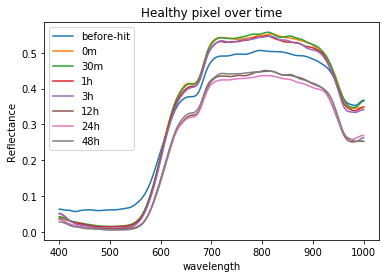

<Figure size 432x288 with 0 Axes>

In [27]:
library_nonbruise = []
library_nonbruise.append([sp.open_image(files[0]).read_pixel(5383,1293), "before-hit" ])
library_nonbruise.append([sp.open_image(files[1]).read_pixel(5236,1270), "0m"])
library_nonbruise.append([sp.open_image(files[2]).read_pixel(5202,1350), "30m"])
library_nonbruise.append([sp.open_image(files[3]).read_pixel(5339,1283), "1h" ])
library_nonbruise.append([sp.open_image(files[4]).read_pixel(5317,1248), "3h" ])
library_nonbruise.append([sp.open_image(files[5]).read_pixel(5043,1168), "12h"])
library_nonbruise.append([sp.open_image(files[6]).read_pixel(4955,1293), "24h"])
library_nonbruise.append([sp.open_image(files[7]).read_pixel(4917,1251), "48h"])


for spec in library_nonbruise:
    plotSpectrum(spec[0], xaxis="wavelength", linelabel=spec[1])
    

plt.title('Healthy pixel over time')
#plt.savefig("spectralLibary_healthy_region.png")
plt.figure()



<Figure size 432x288 with 0 Axes>

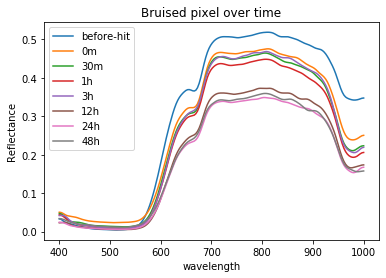

<Figure size 432x288 with 0 Axes>

In [28]:
library_bruise = []
library_bruise.append([sp.open_image(files[0]).read_pixel(5392,1460), "before-hit" ]) #
library_bruise.append([sp.open_image(files[1]).read_pixel(5314,1462), "0m"]) #
library_bruise.append([sp.open_image(files[2]).read_pixel(5288,1543), "30m"]) #
library_bruise.append([sp.open_image(files[3]).read_pixel(5428,1474), "1h" ]) #
library_bruise.append([sp.open_image(files[4]).read_pixel(5409,1441), "3h" ]) #
library_bruise.append([sp.open_image(files[5]).read_pixel(5134,1353), "12h"]) #
library_bruise.append([sp.open_image(files[6]).read_pixel(5036,1474), "24h"]) #
library_bruise.append([sp.open_image(files[7]).read_pixel(4988,1440), "48h"]) #


for spec in library_bruise:
    plotSpectrum(spec[0], xaxis="wavelength", linelabel=spec[1])
    

plt.title('Bruised pixel over time')
#plt.savefig("spectralLibary_bruise_region.png")

plt.figure()